<a href="https://colab.research.google.com/github/Projet4A/Projet4AINT201/blob/Aurelien/P4A_Piotrowski/Graph_P4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importations** 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

# **Load Data**

In [2]:
#Load data from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Ouverture des fichiers**



In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/ClientA_Reports.csv',converters={'SurveyDate':pd.to_datetime,'AnalysisDate':pd.to_datetime,'Date':pd.to_datetime})

data = pd.read_csv('/content/drive/MyDrive/Data/ClientA_Data_NC.csv', converters={'DateTime_x':pd.to_datetime,'Date':pd.to_datetime})

data.FaultName.fillna('Unknown',inplace=True)

index = data.EquipmentClassification.value_counts().index
m_tab = pd.crosstab(data.EquipmentClassification,data.FaultStatus).reindex(index)
i_tab = pd.crosstab(data.EquipmentClassification,data.FaultName).reindex(index)

# **Data to plot**

In [6]:
labels = index.values
sizes = data.EquipmentClassification.value_counts().values
sizes_m = m_tab.values.flatten()
sizes_i = i_tab.values.flatten()

cmapg = plt.cm.Greens
outer_colors = [*cmapg(np.linspace(.8, .1, len(labels)))]
eqp_patches = [mpatches.Patch(color=c, label=labels[l]) for l,c in enumerate(outer_colors)]

cmapb = plt.cm.Blues
m_labels = m_tab.columns.values
middle_colors = [*cmapb(np.linspace(.8, .1, len(m_labels)))]
m_patches = [mpatches.Patch(color=c, label=m_labels[l]) for l,c in enumerate(middle_colors)]

cmapb = plt.cm.Reds
i_labels = i_tab.columns.values
inner_colors = [*cmapb(np.linspace(.8, .1, len(i_labels)))]
i_patches = [mpatches.Patch(color=c, label=i_labels[l]) for l,c in enumerate(inner_colors)]

size = 0.3

# **Plot**

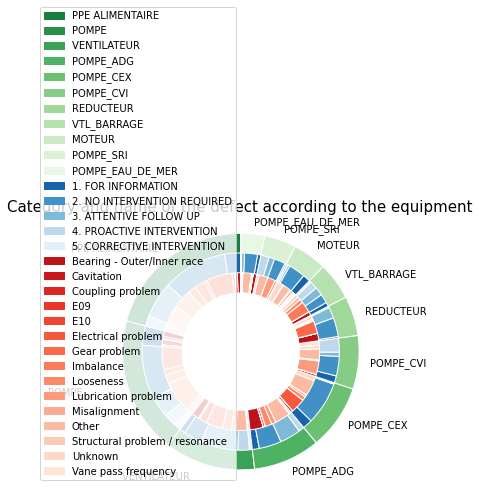

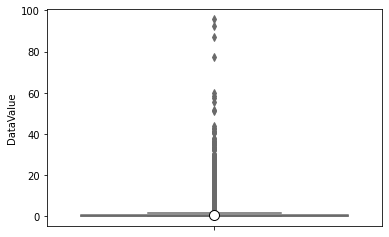

In [7]:
plt.pie(sizes,labels=labels,colors=outer_colors,wedgeprops=dict(width=size, edgecolor='w'),radius = 1.5, startangle=90,frame=True)
plt.pie(sizes_m,colors=middle_colors,wedgeprops=dict(width=size,edgecolor='w'),radius=1.25,startangle=90)
plt.pie(sizes_i,colors=inner_colors,wedgeprops=dict(width=size,edgecolor='w'),radius=1.0,startangle=90)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.title('Category and name of the defect according to the equipment',fontsize=15,pad=10)
plt.legend(handles=eqp_patches+m_patches+i_patches,loc=3,bbox_to_anchor=(-0.03,-0.01))
plt.show()

sns.boxplot(y="DataValue", hue="FaultStatus", data=data, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})